# Connect to Drive to Access Training and Testing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/UF Courses/CAP 5771 - Intro to Data Science/Group-Project'

/content/drive/My Drive/UF Courses/CAP 5771 - Intro to Data Science/Group-Project


In [3]:
%ls

 11112019_train_subsampled.zip              11152019_test_subsampled.zip
 11132019_train_subsampled.zip              11152019_train_anshika.csv
 11142019_train_clean_enc_f_selection.csv   11152019_train_final.csv
 11142019_train_clean_enc_f_selection.zip   Backup-Data/
 11142019_train_jaysanchit_to_anshika.csv   countries.csv
 11142019_train_jaysanchit_to_anshika.zip   Final-Data/
 11142019_train_subsampled.csv              ga-customer-revenue-prediction.zip
 11142019_train_subsampled.zip              NN-models/
 11152019_test_anshika.csv                 'Report Presentation'/
 11152019_test_final.csv                    train_subsampled.zip
 11152019_test_subsampled.csv


# Connect to GPU for Training Neural Network

This code checks that tensorflow is set up to work with GPU.

Note: To connect to GPU, select Edit->Notebook Settings->Hardware Accellerator->GPU to have access to GPU for training neural network.

In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Import Additional Packages Necessary for Training and Testing Neural Network

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow import keras
import seaborn as sns
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# User Defined Functions Used In Notebook

Here we define a function for plotting training/testing accuracy and objective function value over the training process.

In [0]:
# Function to generate plot of training/testing value/accuracy
def train_test_val_acc_plot(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc=history.history['acc']
  val_acc=history.history['val_acc']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'r')
  plt.plot(epochs, val_acc, 'b')
  plt.title('Training and validation accuracy')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Accuracy", "Validation Accuracy"])

  plt.figure()

  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.title('Training and validation loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["Loss", "Validation Loss"])

  plt.figure()

# Functions Written by Jeff Heaton for Confusion Matrix and ROC Curve
These functions were part of a course available on Youtube and the instructor made their code available on GitHub. 

Youtube Lecture: https://www.youtube.com/watch?v=9abzk34U56c

Code: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_2_multi_class.ipynb

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='Neural Network ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, roc_auc

# Load Training and Testing Data

In [0]:
train_data_fname = "11152019_train_final.csv"
test_data_fname = "11152019_test_final.csv"

### Training Data

In [9]:
df_train = pd.read_csv(train_data_fname)
df_train.head()

,channelGrouping,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime,new.returningCustomer,year,month,day,country_dem,latitude,longitude
0,Referral,Chrome,desktop,False,Chrome OS,8.934117e+18,Cupertino,Americas,United States,unknown.unknown,California,Northern America,-1.0,2,0.0,2.0,2.0,28.0,0.0,0.0,0.0,UNK,UNK,UNK,0.0,UNK,(not set),False,UNK,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,1508176307,6,1508176307,1,-0.068615,0.897805,-0.866025,645204,37.090240,-95.712891
1,Direct,Chrome,mobile,True,Android,7.992466e+18,not available in demo dataset,Americas,United States,windjammercable.net,not available in demo dataset,Northern America,-1.0,2,1.0,2.0,1.0,38.0,0.0,0.0,0.0,UNK,UNK,UNK,0.0,UNK,(not set),True,UNK,(none),UNK,(direct),1508201613,1,1508201613,0,-0.068615,0.897805,-0.866025,645204,37.090240,-95.712891
2,Organic Search,Chrome,desktop,False,Windows,9.075656e+18,not available in demo dataset,Asia,Turkey,unknown.unknown,not available in demo dataset,Western Asia,-1.0,2,1.0,2.0,1.0,1.0,0.0,0.0,0.0,UNK,UNK,UNK,0.0,UNK,(not set),False,(not provided),organic,UNK,google,1508169851,1,1508169851,0,-0.068615,0.897805,-0.866025,26282,38.963745,35.243322
3,Organic Search,Chrome,desktop,False,Windows,6.960673e+18,not available in demo dataset,Americas,Mexico,prod-infinitum.com.mx,not available in demo dataset,Central America,-1.0,2,1.0,2.0,1.0,52.0,0.0,0.0,0.0,UNK,UNK,UNK,0.0,UNK,(not set),False,(not provided),organic,UNK,google,1508190552,1,1508190552,0,-0.068615,0.897805,-0.866025,22826,23.634501,-102.552784
4,Referral,Chrome,desktop,False,Macintosh,1.662779e+17,San Francisco,Americas,United States,unknown.unknown,California,Northern America,-1.0,2,1.0,2.0,2.0,12.0,0.0,0.0,0.0,UNK,UNK,UNK,0.0,UNK,(not set),False,UNK,(none),/offer/2145,(direct),1508196701,1,1508196701,1,-0.068615,0.897805,-0.866025,645204,37.090240,-95.712891


In [10]:
df_train.shape

(1537503, 42)

In [11]:
df_train.dtypes

channelGrouping                                  object
device.browser                                   object
device.deviceCategory                            object
device.isMobile                                    bool
device.operatingSystem                           object
fullVisitorId                                   float64
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                          object
totals.bounces                                  float64
totals.hits                                       int64
totals.newVisits                                float64
totals.pageviews                                float64
totals.sessionQualityDim                        float64
totals.timeOnSite                               

### Testing Data

In [12]:
df_test = pd.read_csv(test_data_fname)
df_test.head()

,channelGrouping,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime,new.returningCustomer,year,month,day,country_dem,latitude,longitude
0,Organic Search,Chrome,mobile,True,Android,7.460955e+18,(not set),Asia,India,unknown.unknown,Delhi,Southern Asia,-1.0,4,0.0,3.0,1,973.0,0.0,0.0,0.0,(not set),UNK,UNK,0.0,UNK,(not set),True,(not provided),organic,(not set),google,1526099341,2,1526099341,1,-0.085731,0.848644,0.258819,26043,20.593684,78.962880
1,Direct,Chrome,desktop,False,Macintosh,4.602525e+17,San Francisco,Americas,United States,unknown.unknown,California,Northern America,-1.0,4,0.0,3.0,1,49.0,0.0,0.0,0.0,(not set),UNK,UNK,0.0,UNK,(not set),True,(not set),(none),(not set),(direct),1526064483,166,1526064483,1,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891
2,Organic Search,Chrome,desktop,False,Chrome OS,3.461809e+18,not available in demo dataset,Americas,United States,onlinecomputerworks.com,not available in demo dataset,Northern America,-1.0,4,0.0,3.0,1,24.0,0.0,0.0,0.0,(not set),UNK,UNK,0.0,UNK,(not set),True,(not provided),organic,(not set),google,1526067157,2,1526067157,1,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891
3,Direct,Chrome,mobile,True,iOS,9.751295e+17,Houston,Americas,United States,unknown.unknown,Texas,Northern America,-1.0,5,0.0,4.0,1,25.0,0.0,0.0,0.0,(not set),UNK,UNK,0.0,UNK,(not set),True,(not set),(none),(not set),(direct),1526107551,4,1526107551,1,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891
4,Organic Search,Internet Explorer,tablet,True,Windows,8.381673e+18,Irvine,Americas,United States,com,California,Northern America,-1.0,5,1.0,4.0,1,49.0,0.0,0.0,0.0,(not set),UNK,UNK,0.0,UNK,(not set),False,(not provided),organic,(not set),google,1526060254,1,1526060254,0,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891


In [13]:
df_test.shape

(361429, 42)

In [14]:
df_test.dtypes

channelGrouping                                  object
device.browser                                   object
device.deviceCategory                            object
device.isMobile                                    bool
device.operatingSystem                           object
fullVisitorId                                   float64
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                          object
totals.bounces                                  float64
totals.hits                                       int64
totals.newVisits                                float64
totals.pageviews                                float64
totals.sessionQualityDim                          int64
totals.timeOnSite                               

# Minor Data Preprocessing Before Providing to Neural Network

Note: The heavy data preprocessing (sampling, feature engineering, feature selection) was done prior to loading the data in this notebook. Here we are performing the following minimal preprocessing so that the data is in a suitable format for the neural network:

* Removing fullVisitorId, visitId, and visitStartTime - Think about this more but I do not think we should be using fullVisitorId and visitId because they are generated for each user and are essentially an index value and the visitStartTime was not converted during preprocessing/feature engineering and looks like it will cause problems
* Converting categorical features to a suitable format for the neural network
* Normalizing columns of the data

### Initialize Training and Testing Features and Labels and Remove fullVisitorId from Dataset

In [0]:
X_train = df_train.drop(columns=['new.returningCustomer']) #, 'fullVisitorId', 'visitId', 'visitStartTime'])
y_train = df_train['new.returningCustomer']

X_test = df_test.drop(columns=['new.returningCustomer']) #, 'fullVisitorId', 'visitId', 'visitStartTime'])
y_test = df_test['new.returningCustomer']

### Visualize Data to Determine Additional Features to Remove

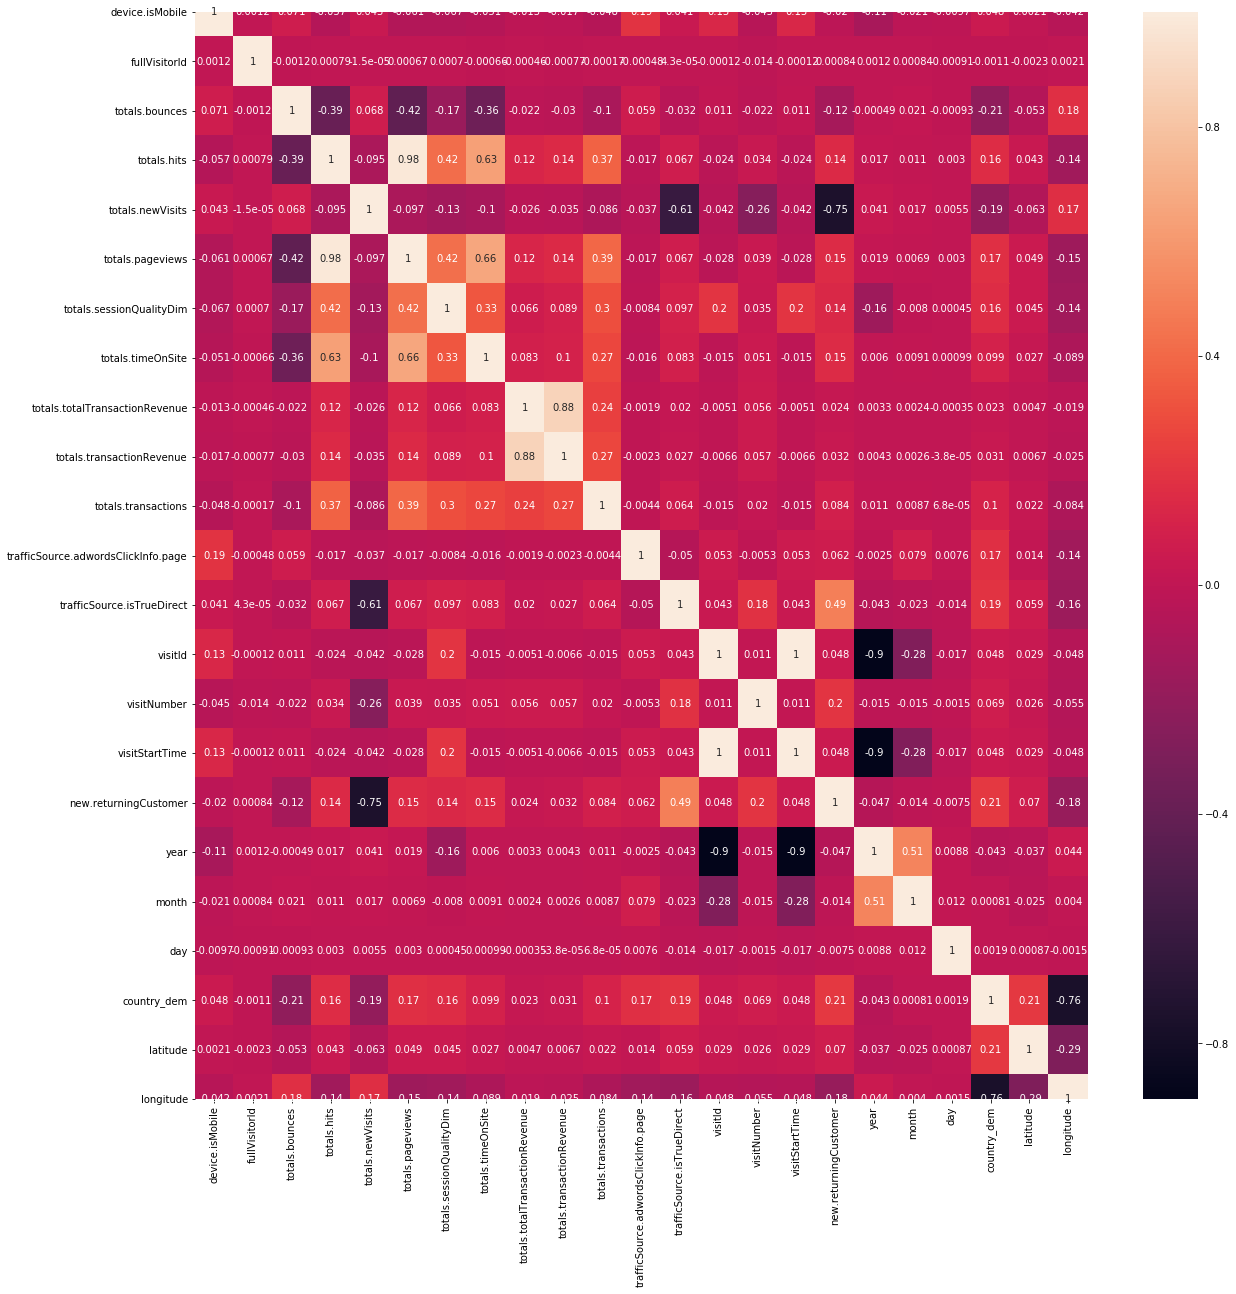

In [0]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(df_train.corr(), annot=True, ax=ax)

### Convert Categorical Features

In [16]:
# Initialize label binarizer
lb = preprocessing.LabelBinarizer()

# Training data
X_train['trafficSource.isTrueDirect'] = lb.fit_transform(X_train['trafficSource.isTrueDirect'])
X_train['device.isMobile'] = lb.transform(X_train['device.isMobile'])
#X_train['visitStartTime'].dtype == np.int64

ignoreColumns = {''}
for column in X_train.columns:
    if (X_train[column].dtype != np.int64 and X_train[column].dtype != np.float64):
        print("Converting column: {}".format(column))

        le = preprocessing.LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        del le

# Testing data
X_test['trafficSource.isTrueDirect'] = lb.fit_transform(X_test['trafficSource.isTrueDirect'])
X_test['device.isMobile'] = lb.transform(X_test['device.isMobile'])
#X_test['visitStartTime'].dtype == np.int64

ignoreColumns = {''}
for column in X_test.columns:
    if (X_test[column].dtype != np.int64 and X_test[column].dtype != np.float64):
        print("Converting column: {}".format(column))

        le = preprocessing.LabelEncoder()
        X_test[column] = le.fit_transform(X_test[column])
        del le

Converting column: channelGrouping
Converting column: device.browser
Converting column: device.deviceCategory
Converting column: device.operatingSystem
Converting column: geoNetwork.city
Converting column: geoNetwork.continent
Converting column: geoNetwork.country
Converting column: geoNetwork.networkDomain
Converting column: geoNetwork.region
Converting column: geoNetwork.subContinent
Converting column: trafficSource.adContent
Converting column: trafficSource.adwordsClickInfo.adNetworkType
Converting column: trafficSource.adwordsClickInfo.gclId
Converting column: trafficSource.adwordsClickInfo.slot
Converting column: trafficSource.campaign
Converting column: trafficSource.keyword
Converting column: trafficSource.medium
Converting column: trafficSource.referralPath
Converting column: trafficSource.source
Converting column: channelGrouping
Converting column: device.browser
Converting column: device.deviceCategory
Converting column: device.operatingSystem
Converting column: geoNetwork.ci

In [17]:
X_train.dtypes

channelGrouping                                   int64
device.browser                                    int64
device.deviceCategory                             int64
device.isMobile                                   int64
device.operatingSystem                            int64
fullVisitorId                                   float64
geoNetwork.city                                   int64
geoNetwork.continent                              int64
geoNetwork.country                                int64
geoNetwork.networkDomain                          int64
geoNetwork.region                                 int64
geoNetwork.subContinent                           int64
totals.bounces                                  float64
totals.hits                                       int64
totals.newVisits                                float64
totals.pageviews                                float64
totals.sessionQualityDim                        float64
totals.timeOnSite                               

In [18]:
X_train.head()

,channelGrouping,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime,year,month,day,country_dem,latitude,longitude
0,6,35,0,0,3,8.934117e+18,220,2,218,36704,73,12,-1.0,2,0.0,2.0,2.0,28.0,0.0,0.0,0.0,58,3,53859,0.0,3,4,0,521,6,289,295,1508176307,6,1508176307,-0.068615,0.897805,-0.866025,645204,37.090240,-95.712891
1,2,35,1,1,1,7.992466e+18,955,2,218,38798,482,12,-1.0,2,1.0,2.0,1.0,38.0,0.0,0.0,0.0,58,3,53859,0.0,3,4,1,521,0,3089,0,1508201613,1,1508201613,-0.068615,0.897805,-0.866025,645204,37.090240,-95.712891
2,4,35,0,0,19,9.075656e+18,955,3,210,36704,482,21,-1.0,2,1.0,2.0,1.0,1.0,0.0,0.0,0.0,58,3,53859,0.0,3,4,0,7,5,3089,99,1508169851,1,1508169851,-0.068615,0.897805,-0.866025,26282,38.963745,35.243322
3,4,35,0,0,19,6.960673e+18,955,2,132,27691,482,3,-1.0,2,1.0,2.0,1.0,52.0,0.0,0.0,0.0,58,3,53859,0.0,3,4,0,7,5,3089,99,1508190552,1,1508190552,-0.068615,0.897805,-0.866025,22826,23.634501,-102.552784
4,6,35,0,0,7,1.662779e+17,749,2,218,36704,73,12,-1.0,2,1.0,2.0,2.0,12.0,0.0,0.0,0.0,58,3,53859,0.0,3,4,0,521,0,2179,0,1508196701,1,1508196701,-0.068615,0.897805,-0.866025,645204,37.090240,-95.712891


In [19]:
X_test.dtypes

channelGrouping                                   int64
device.browser                                    int64
device.deviceCategory                             int64
device.isMobile                                   int64
device.operatingSystem                            int64
fullVisitorId                                   float64
geoNetwork.city                                   int64
geoNetwork.continent                              int64
geoNetwork.country                                int64
geoNetwork.networkDomain                          int64
geoNetwork.region                                 int64
geoNetwork.subContinent                           int64
totals.bounces                                  float64
totals.hits                                       int64
totals.newVisits                                float64
totals.pageviews                                float64
totals.sessionQualityDim                          int64
totals.timeOnSite                               

In [20]:
X_test.head()

,channelGrouping,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime,year,month,day,country_dem,latitude,longitude
0,4,24,1,1,1,7.460955e+18,0,3,85,13773,67,18,-1.0,4,0.0,3.0,1,973.0,0.0,0.0,0.0,0,2,8199,0.0,5,3,1,2,5,0,60,1526099341,2,1526099341,-0.085731,0.848644,0.258819,26043,20.593684,78.962880
1,2,24,0,0,7,4.602525e+17,389,2,198,13773,37,12,-1.0,4,0.0,3.0,1,49.0,0.0,0.0,0.0,0,2,8199,0.0,5,3,1,3,0,0,0,1526064483,166,1526064483,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891
2,4,24,0,0,3,3.461809e+18,502,2,198,9637,268,12,-1.0,4,0.0,3.0,1,24.0,0.0,0.0,0.0,0,2,8199,0.0,5,3,1,2,5,0,60,1526067157,2,1526067157,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891
3,2,24,1,1,20,9.751295e+17,185,2,198,13773,235,12,-1.0,5,0.0,4.0,1,25.0,0.0,0.0,0.0,0,2,8199,0.0,5,3,1,3,0,0,0,1526107551,4,1526107551,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891
4,4,31,2,1,17,8.381673e+18,191,2,198,2723,37,12,-1.0,5,1.0,4.0,1,49.0,0.0,0.0,0.0,0,2,8199,0.0,5,3,0,2,5,0,60,1526060254,1,1526060254,-0.085731,0.848644,0.258819,162791,37.090240,-95.712891


### Normalizing Columns of the Data

In [0]:
# Combine training and testing into single data frame (training on top of testing)
X = pd.concat([X_train, X_test], axis=0)
# Use sklearn StandardScaler funciton to rescale data
scaler = preprocessing.StandardScaler()
X_scaler = scaler.fit_transform(X)
# Separate training and testing data
slice_point = X_train.shape[0]
X_train_scaler = X_scaler[:slice_point]
X_test_scaler = X_scaler[slice_point:]

In [22]:
X_train_scaler

array([[ 0.92563588, -0.36097593, -0.63777462, ...,  1.37880482,
         0.23953964, -0.89457278],
       [-1.41830043, -0.36097593,  1.18496569, ...,  1.37880482,
         0.23953964, -0.89457278],
       [-0.24633227, -0.36097593, -0.63777462, ..., -0.77225184,
         0.33970754,  0.69241581],
       ...,
       [ 1.51161996, -0.83343129,  1.18496569, ..., -0.82748083,
         0.17631758,  1.81366003],
       [ 1.51161996, -0.36097593, -0.63777462, ..., -0.8114206 ,
        -1.78570795,  1.64587264],
       [ 1.51161996, -0.36097593,  1.18496569, ..., -0.78426313,
        -0.47987831, -0.9774618 ]])

In [0]:
# Set list of columns that need to be normalized
norm_columns = ['channelGrouping',
                'device.browser',
                'device.deviceCategory',
                'device.operatingSystem',
                'geoNetwork.city',
                'geoNetwork.continent',
                'geoNetwork.country',
                'geoNetwork.networkDomain',
                'geoNetwork.region',
                'geoNetwork.subContinent',
                'trafficSource.adContent',
                'trafficSource.adwordsClickInfo.adNetworkType',
                'trafficSource.adwordsClickInfo.gclId',
                'trafficSource.adwordsClickInfo.slot',
                'trafficSource.campaign',
                'trafficSource.keyword',
                'trafficSource.medium',
                'trafficSource.referralPath',
                'trafficSource.source',
                ]
# Additional columns to normalize
norm_columns += ['totals.bounces',
                 'totals.hits',
                 'totals.newVisits',
                 'totals.pageviews',
                 'totals.sessionQualityDim',
                 'totals.timeOnSite',
                 'totals.totalTransactionRevenue',
                 'totals.transactionRevenue',
                 'totals.transactions',
                 'visitNumber',
                 'country_dem',
                 'latitude',
                 'longitude']
# PLaying with more columns
norm_columns += ['fullVisitorId', 'visitId', 'visitStartTime']

# Copy original data before normalizing
X_train_norm = X_train
X_test_norm = X_test

# Perform min max normalization of certain columns of data
X_train_norm[norm_columns] = (X_train_norm[norm_columns] - X_train_norm[norm_columns].min())/(X_train_norm[norm_columns].max() - X_train_norm[norm_columns].min())
X_test_norm[norm_columns] = (X_test_norm[norm_columns] - X_test_norm[norm_columns].min())/(X_test_norm[norm_columns].max() - X_test_norm[norm_columns].min())

In [24]:
X_train_norm.head()

,channelGrouping,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime,year,month,day,country_dem,latitude,longitude
0,0.857143,0.291667,0.0,0,0.136364,0.090324,0.230366,0.4,0.960352,0.922489,0.151452,0.545455,0.0,0.002004,0.0,0.002004,0.02,0.001472,0.0,0.0,0.0,0.763158,1.0,1.0,0.0,1.0,0.125,0,0.124018,1.000000,0.093558,0.877976,0.691934,0.010965,0.691934,-0.068615,0.897805,-0.866025,1.000000,0.692590,0.224147
1,0.285714,0.291667,0.5,1,0.045455,0.080804,1.000000,0.4,0.960352,0.975118,1.000000,0.545455,0.0,0.002004,1.0,0.002004,0.01,0.001998,0.0,0.0,0.0,0.763158,1.0,1.0,0.0,1.0,0.125,1,0.124018,0.000000,1.000000,0.000000,0.692393,0.000000,0.692393,-0.068615,0.897805,-0.866025,1.000000,0.692590,0.224147
2,0.571429,0.291667,0.0,0,0.863636,0.091755,1.000000,0.6,0.925110,0.922489,1.000000,0.954545,0.0,0.002004,1.0,0.002004,0.01,0.000053,0.0,0.0,0.0,0.763158,1.0,1.0,0.0,1.0,0.125,0,0.001666,0.833333,1.000000,0.294643,0.691817,0.000000,0.691817,-0.068615,0.897805,-0.866025,0.040733,0.709227,0.593441
3,0.571429,0.291667,0.0,0,0.863636,0.070372,1.000000,0.4,0.581498,0.695964,1.000000,0.136364,0.0,0.002004,1.0,0.002004,0.01,0.002734,0.0,0.0,0.0,0.763158,1.0,1.0,0.0,1.0,0.125,0,0.001666,0.833333,1.000000,0.294643,0.692193,0.000000,0.692193,-0.068615,0.897805,-0.866025,0.035376,0.573097,0.204859
4,0.857143,0.291667,0.0,0,0.318182,0.001681,0.784293,0.4,0.960352,0.922489,0.151452,0.545455,0.0,0.002004,1.0,0.002004,0.02,0.000631,0.0,0.0,0.0,0.763158,1.0,1.0,0.0,1.0,0.125,0,0.124018,0.000000,0.705406,0.000000,0.692304,0.000000,0.692304,-0.068615,0.897805,-0.866025,1.000000,0.692590,0.224147


In [25]:
X_test_norm.head()

,channelGrouping,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime,year,month,day,country_dem,latitude,longitude
0,0.571429,0.421053,0.5,1,0.05,0.087508,0.000000,0.6,0.414634,0.915454,0.250000,0.818182,0.0,0.006012,0.0,0.004008,0.0,0.060345,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.12,1,0.003165,0.833333,0.0,0.319149,0.064894,0.001916,0.064852,-0.085731,0.848644,0.258819,0.159973,0.546094,0.712623
1,0.285714,0.421053,0.0,0,0.35,0.005398,0.774900,0.4,0.965854,0.915454,0.138060,0.545455,0.0,0.006012,0.0,0.004008,0.0,0.003039,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.12,1,0.004747,0.000000,0.0,0.000000,0.062493,0.316092,0.062450,-0.085731,0.848644,0.258819,1.000000,0.692590,0.212902
2,0.571429,0.421053,0.0,0,0.15,0.040603,1.000000,0.4,0.965854,0.640545,1.000000,0.545455,0.0,0.006012,0.0,0.004008,0.0,0.001488,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.12,1,0.003165,0.833333,0.0,0.319149,0.062677,0.001916,0.062635,-0.085731,0.848644,0.258819,1.000000,0.692590,0.212902
3,0.285714,0.421053,0.5,1,1.00,0.011437,0.368526,0.4,0.965854,0.915454,0.876866,0.545455,0.0,0.008016,0.0,0.006012,0.0,0.001550,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.12,1,0.004747,0.000000,0.0,0.000000,0.065460,0.005747,0.065417,-0.085731,0.848644,0.258819,1.000000,0.692590,0.212902
4,0.571429,0.543860,1.0,1,0.85,0.098306,0.380478,0.4,0.965854,0.180990,0.138060,0.545455,0.0,0.008016,1.0,0.006012,0.0,0.003039,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.12,0,0.003165,0.833333,0.0,0.319149,0.062201,0.000000,0.062159,-0.085731,0.848644,0.258819,1.000000,0.692590,0.212902


# Set Up Neural Network Model

In [0]:
# Select subset of data to keep based on heatmap
keep_cols = ['totals.bounces',
             'totals.hits',
             'totals.newVisits',
             'totals.pageviews',
             'totals.sessionQualityDim',
             'totals.timeOnSite',
             'trafficSource.isTrueDirect',
             'visitNumber',
             'country_dem',
             'latitude',
             'longitude']
# Select subset of columns
X_train_new = X_train[keep_cols]
X_test_new = X_test[keep_cols]

In [0]:
X_train_new.head()

,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,trafficSource.isTrueDirect,visitNumber,country_dem,latitude,longitude
0,0.0,0.002004,0.0,0.002004,0.02,0.001472,0,0.010965,1.000000,0.692590,0.224147
1,0.0,0.002004,1.0,0.002004,0.01,0.001998,1,0.000000,1.000000,0.692590,0.224147
2,0.0,0.002004,1.0,0.002004,0.01,0.000053,0,0.000000,0.040733,0.709227,0.593441
3,0.0,0.002004,1.0,0.002004,0.01,0.002734,0,0.000000,0.035376,0.573097,0.204859
4,0.0,0.002004,1.0,0.002004,0.02,0.000631,0,0.000000,1.000000,0.692590,0.224147


In [0]:
# Set training and testing data and labels
# Subsample part of data for quick training of neural network to see if it is suitable architecture before training on full training set
#training_data = X_train_new[:300000]
#test_data = X_test_new[:50000]
training_data = X_train_scaler[:30000]
test_data = X_test_scaler[:5000]
training_labels = y_train[:30000]
test_labels= y_test[:5000]

# Experimenting with dropping visitNumber
#training_data = training_data.drop(columns=['visitNumber'])
#test_data = test_data.drop(columns=['visitNumber'])

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 48)                2016      
_________________________________________________________________
dropout_84 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 24)                1176      
_________________________________________________________________
dropout_85 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 25        
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________
Train on 30000 samples, validate on 5000 samples
Epoch 1/100
30000/30000 - 2s - loss: 0.7789 - acc: 0.5726 - val_loss

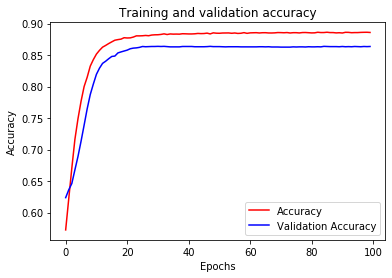

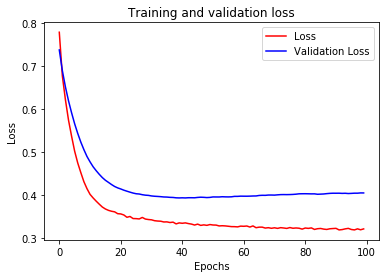

<Figure size 432x288 with 0 Axes>

In [0]:
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 256 #512
# Set number of epochs for training
num_epochs = 100
# Specify learning rate for custom optimizer
lr=0.0001
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
DNN_model = tf.keras.Sequential([
    # Fully connected layer
    tf.keras.layers.Dense(48, activation='relu', input_dim=input_dim),
    # Dropout layer
    tf.keras.layers.Dropout(0.2),
    # Fully connected layer
    #tf.keras.layers.Dense(64, activation='relu'),
    # Dropout layer
    #tf.keras.layers.Dropout(0.3),
    # Fully connected layer
    #tf.keras.layers.Dense(64, activation='relu'),
    # Dropout layer
    #tf.keras.layers.Dropout(0.5),
    # Fully connected layer
    tf.keras.layers.Dense(24, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.4),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_adam,
    metrics=['acc']
)
# Print summary of multilayer DNN model
DNN_model.summary()

# Train model (training multilayer DNN model)
history = DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    #callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(history)

# Model With Batch Normalization

In [0]:
# Set training and testing data and labels
# Subsample part of data for quick training of neural network to see if it is suitable architecture before training on full training set
#training_data = X_train_new[:300000]
#test_data = X_test_new[:50000]
training_data = X_train_scaler #[:300000]
test_data = X_test_scaler #[:50000]
training_labels = y_train #[:300000]
test_labels= y_test #[:50000]

# Experimenting with dropping visitNumber
#training_data = training_data.drop(columns=['visitNumber'])
#test_data = test_data.drop(columns=['visitNumber'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                2016      
_________________________________________________________________
batch_normalization (BatchNo (None, 48)                192       
_________________________________________________________________
activation (Activation)      (None, 48)                0         
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
batch_normali

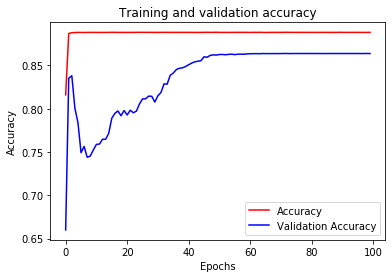

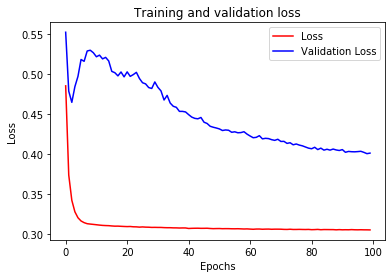

<Figure size 432x288 with 0 Axes>

In [0]:
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 512
# Set number of epochs for training
num_epochs = 100
# Specify learning rate for custom optimizer
lr=0.0001
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
BN_DNN_model = tf.keras.Sequential()

# Input Layer
BN_DNN_model.add(tf.keras.layers.Dense(48, input_dim=input_dim))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.2))

# Hidden Layer
BN_DNN_model.add(tf.keras.layers.Dense(24))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
BN_DNN_model.add(tf.keras.layers.Dense(1))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('sigmoid'))

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
BN_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_adam,
    metrics=['acc']
)
# Print summary of multilayer DNN model
BN_DNN_model.summary()

# Train model (training multilayer DNN model)
BN_DNN_history = BN_DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    #callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(BN_DNN_history)

In [0]:
# Save the weights
#BN_DNN_model.save_weights('NN-models/BN_DNN_model')

In [30]:
# Specify learning rate for custom optimizer
lr=0.0001
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)

# Code for loading and testing model
def create_BN_DNN_model(input_dim):
  model = tf.keras.Sequential()
  # Input Layer
  model.add(tf.keras.layers.Dense(48, input_dim=input_dim))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Hidden Layer
  model.add(tf.keras.layers.Dense(24))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.4))

  # Output layer
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('sigmoid'))

  # Compile multilayer DNN model
  model.compile(
      loss='binary_crossentropy',
      optimizer=custom_adam,
      metrics=['acc']
  )

  return model

# Create a new model instance
load_model = create_BN_DNN_model(test_data.shape[1])
# Restore the weights
load_model.load_weights('NN-models/BN_DNN_model')
# Evaluate the model
loss,acc = load_model.evaluate(test_data, test_labels, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
361429/361429 - 17s - loss: 0.4010 - acc: 0.8637


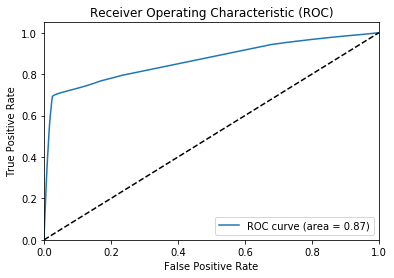

In [31]:
# Plot ROC curve for DNN with batch normalization
BN_DNN_pred = load_model.predict(test_data)
plot_roc(BN_DNN_pred, test_labels)

# Model without Batch Normalization

In [0]:
# Select subset of data to keep based on heatmap
keep_cols = ['totals.bounces',
             'totals.hits',
             'totals.newVisits',
             'totals.pageviews',
             'totals.sessionQualityDim',
             'totals.timeOnSite',
             'trafficSource.isTrueDirect',
             'visitNumber',
             'country_dem',
             'latitude',
             'longitude']
# Select subset of columns
X_train_new = X_train_norm[keep_cols]
X_test_new = X_test_norm[keep_cols]

# Subsample part of data for quick training of neural network to see if it is suitable architecture before training on full training set
training_data = X_train_new #[:300000]
test_data = X_test_new #[:50000]
training_labels = y_train #[:30000]
test_labels= y_test #[:5000]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                768       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 5,985
Trainable params: 5,985
Non-trainable params: 0
____________________________________________________

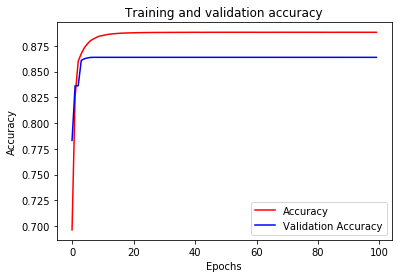

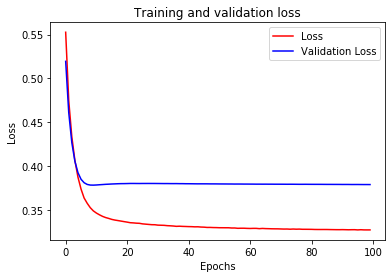

<Figure size 432x288 with 0 Axes>

In [0]:
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 512
# Set number of epochs for training
num_epochs = 100
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
Decent_DNN_model = tf.keras.Sequential([
    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim),
    # Dropout layer
    tf.keras.layers.Dropout(0.3),
    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.3),
    # Fully connected layer
    tf.keras.layers.Dense(16, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=0.0005)

# Compile multilayer DNN model
Decent_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_sgd,
    metrics=['acc']
)
# Print summary of multilayer DNN model
Decent_DNN_model.summary()

# Train model (training multilayer DNN model)
Decent_DNN_history = Decent_DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    #callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(Decent_DNN_history)

In [0]:
# Save the weights
#Decent_DNN_model.save_weights('NN-models/Decent_DNN_model')

In [33]:
# Specify learning rate for custom optimizer
custom_sgd = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Code for loading and testing model
def create_Decent_DNN_model(input_dim):
  # Model for DNN with two hidden layers
  model = tf.keras.Sequential([
      # Fully connected layer
      tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim),
      # Dropout layer
      tf.keras.layers.Dropout(0.3),
      # Fully connected layer
      tf.keras.layers.Dense(64, activation='relu'),
      # Dropout layer
      tf.keras.layers.Dropout(0.3),
      # Fully connected layer
      tf.keras.layers.Dense(16, activation='relu'),
      # Output layer
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compile multilayer DNN model
  model.compile(
      loss='binary_crossentropy',
      optimizer=custom_sgd,
      metrics=['acc']
  )

  return model

# Create a new model instance
load_Decent_DNN_model = create_Decent_DNN_model(test_data.shape[1])
# Restore the weights
load_Decent_DNN_model.load_weights('NN-models/Decent_DNN_model')
# Evaluate the model
loss,acc = load_Decent_DNN_model.evaluate(test_data, test_labels, verbose=2)

361429/361429 - 13s - loss: 0.3787 - acc: 0.8639


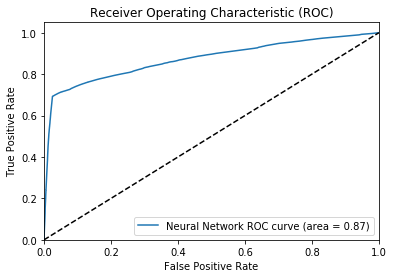

In [41]:
# Plot ROC curve for DNN with batch normalization
Decent_DNN_pred = load_Decent_DNN_model.predict(test_data)
roc_x, roc_y, roc_auc = plot_roc(Decent_DNN_pred, test_labels)

In [0]:
# Save roc_x, roc_y, and roc_auc to file
np.savetxt("Decent_DNN_roc_x.csv", roc_x, delimiter=",")
np.savetxt("Decent_DNN_roc_y.csv", roc_y, delimiter=",")
np.savetxt("Decent_DNN_roc_auc.csv", np.array([roc_auc]), delimiter=",")

## Model With Good Plot of Training/Testing Accuracy

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 17        
Total params: 5,985
Trainable params: 5,985
Non-trainable params: 0
___________________________________________________

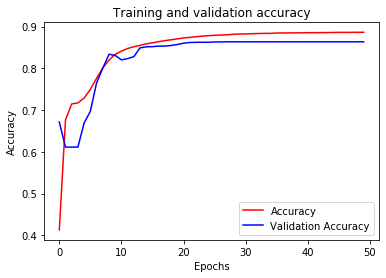

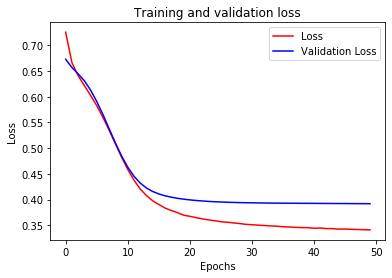

<Figure size 432x288 with 0 Axes>

In [0]:
# Subsample part of data for quick training of neural network to see if it is suitable architecture before training on full training set
training_data = X_train_new[:300000]
test_data = X_test_new[:50000]
training_labels = y_train[:30000]
test_labels= y_test[:5000]

# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 512
# Set number of epochs for training
num_epochs = 50
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
Decent_DNN_model = tf.keras.Sequential([
    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim),
    # Dropout layer
    tf.keras.layers.Dropout(0.3),
    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.3),
    # Fully connected layer
    tf.keras.layers.Dense(16, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=0.0005)

# Compile multilayer DNN model
Decent_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_sgd,
    metrics=['acc']
)
# Print summary of multilayer DNN model
Decent_DNN_model.summary()

# Train model (training multilayer DNN model)
Decent_DNN_history = Decent_DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    #callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(Decent_DNN_history)

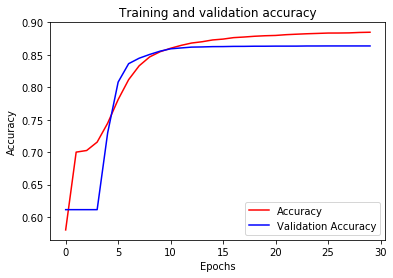

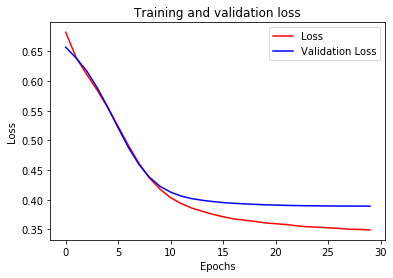

<Figure size 432x288 with 0 Axes>

In [0]:
# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(history)